
# Final Project: Unsupervised Machine Learning

This project aims to apply unsupervised machine learning techniques on a health-related dataset to find underlying patterns in the data. The techniques to be used include clustering algorithms such as K-Means and DBSCAN. Further, the project will involve data preprocessing, model evaluation, and finding the optimal number of clusters.

## Dataset Information
The dataset being used for this project has been sourced from the following Kaggle competition - https://www.kaggle.com/competitions/diabetes-prediction-tfug-chd-nov-2022/data. The data includes various health attributes of individuals, including general health, mental health, physical health, age, and BMI. Additionally, it also has information about whether the individual has been diagnosed with Diabetes, Hypertension or had a Stroke.





Develop a software code for preprocessing the dataset, i.e., for computing the distance between different
data objects. Notice that you have to cope with binary and discrete attributes!!!

## Import Required Libraries
We import the necessary libraries required for data manipulation, data visualization, and model creation.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,StandardScaler, Normalizer, MinMaxScaler, RobustScaler,LabelEncoder,OrdinalEncoder
from sklearn.svm import SVC
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import pdist
import numpy as np


## Data Loading and Preprocessing
Here we load our dataset and perform basic preprocessing like checking data types, handling missing values, and reshaping the data.


In [ ]:
# Load the dataset
rand_seed=42
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/diabetes_unsupervised/train_data.csv")
df.head(10)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,1.0,18.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0
6,13.0,1.0,1.0,1.0,26.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,6.0,1.0,0.0,1.0,31.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3.0,0.0,0.0,1.0,32.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
9,6.0,1.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,6.0,0.0,0.0,0.0,0.0


In [ ]:
df=df.convert_dtypes()

In [ ]:
print(df.dtypes)

Age                     Int64
Sex                     Int64
HighChol                Int64
CholCheck               Int64
BMI                     Int64
Smoker                  Int64
HeartDiseaseorAttack    Int64
PhysActivity            Int64
Fruits                  Int64
Veggies                 Int64
HvyAlcoholConsump       Int64
GenHlth                 Int64
MentHlth                Int64
PhysHlth                Int64
DiffWalk                Int64
Diabetes                Int64
Hypertension            Int64
Stroke                  Int64
dtype: object


In [ ]:
df.isna().sum()/len(df)*100

Age                     0.0
Sex                     0.0
HighChol                0.0
CholCheck               0.0
BMI                     0.0
Smoker                  0.0
HeartDiseaseorAttack    0.0
PhysActivity            0.0
Fruits                  0.0
Veggies                 0.0
HvyAlcoholConsump       0.0
GenHlth                 0.0
MentHlth                0.0
PhysHlth                0.0
DiffWalk                0.0
Diabetes                0.0
Hypertension            0.0
Stroke                  0.0
dtype: float64

In [ ]:
x=df.iloc[:,:-3]


In [ ]:
yA=df['Diabetes']
yB=df['Stroke']
yC=df['Hypertension']

In [ ]:
x

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk
0,4,1,0,1,26,0,0,1,0,1,0,3,5,30,0
1,12,1,1,1,26,1,0,0,1,0,0,3,0,0,0
2,13,1,0,1,26,0,0,1,1,1,0,1,0,10,0
3,11,1,1,1,28,1,0,1,1,1,0,3,0,3,0
4,8,0,0,1,29,1,0,1,1,1,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80687,3,0,0,1,23,1,0,1,0,1,0,3,8,0,1
80688,10,1,1,1,22,0,0,0,0,0,0,3,0,30,1
80689,7,1,0,1,25,1,0,1,1,0,0,2,5,0,0
80690,4,0,1,0,29,0,0,1,1,1,0,3,0,15,0


# Exploratory data analysis¶


In [ ]:
for col in x.columns:
    print(f"{col}: {np.sort(x[col].unique())}")


Age: [1 2 3 4 5 6 7 8 9 10 11 12 13]
Sex: [0 1]
HighChol: [0 1]
CholCheck: [0 1]
BMI: [12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35
 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 89 92 95 98]
Smoker: [0 1]
HeartDiseaseorAttack: [0 1]
PhysActivity: [0 1]
Fruits: [0 1]
Veggies: [0 1]
HvyAlcoholConsump: [0 1]
GenHlth: [1 2 3 4 5]
MentHlth: [0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30]
PhysHlth: [0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30]
DiffWalk: [0 1]


## Catogorical

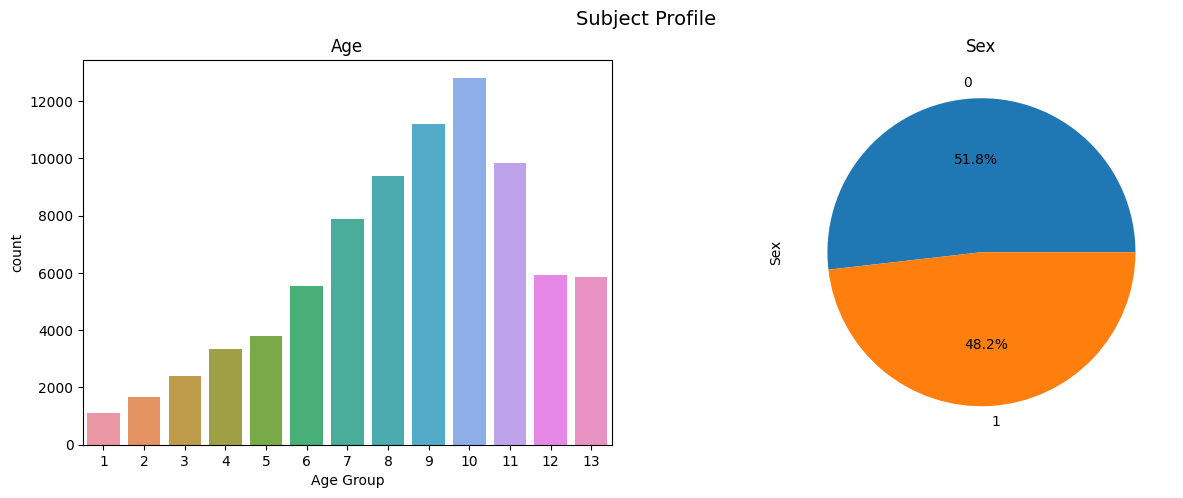

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes = axes.flatten()
sns.countplot(x='Age', data=x, ax=axes[0])
axes[0].set_title('Age')
axes[0].set_xlabel('Age Group')

for i, col in enumerate(['Sex']):
    x[col].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[i+1], title=col)
plt.suptitle('Subject Profile', fontsize=14)
plt.show()

In [ ]:
cat_disease = ['HighChol', 'CholCheck', 'HeartDiseaseorAttack', 'DiffWalk']

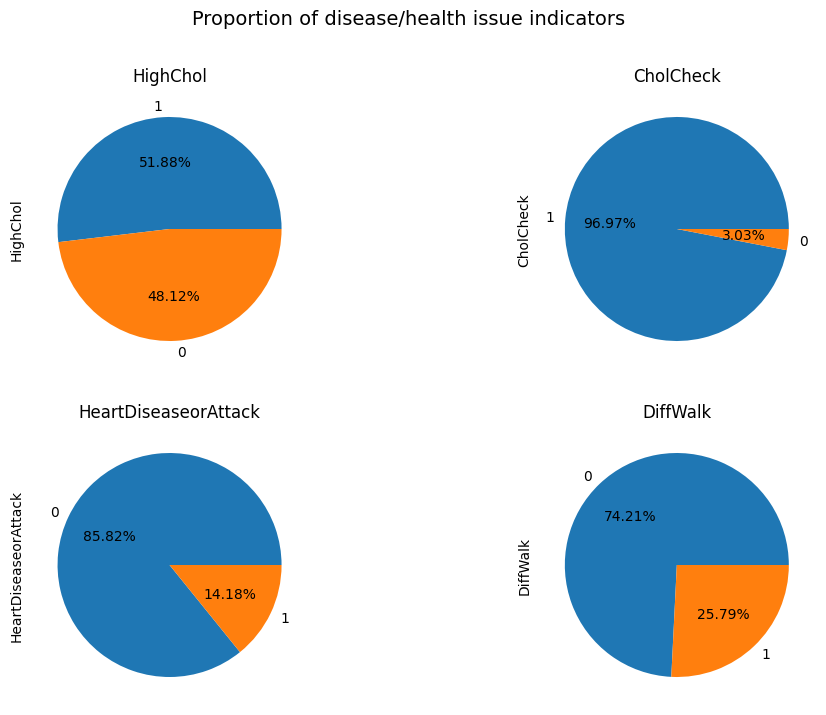

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
for i, col in enumerate(cat_disease):
    x[col].value_counts().plot.pie(ax=ax[i//2, i%2], autopct='%.2f%%', title=col)
plt.suptitle('Proportion of disease/health issue indicators', fontsize=14)
plt.show()

In [ ]:
cat_health = ['GenHlth', 'MentHlth', 'PhysHlth']

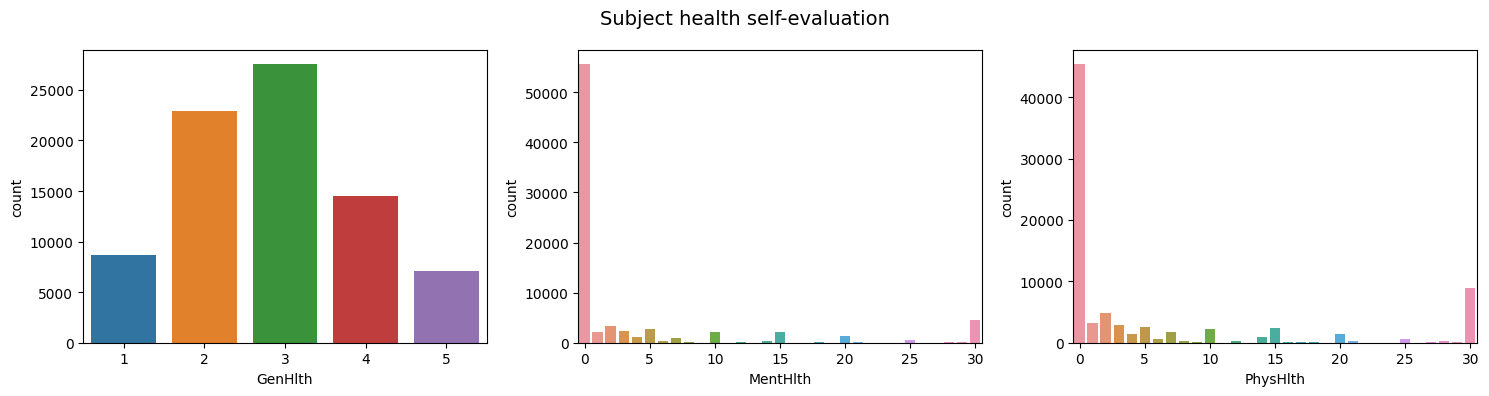

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes = axes.flatten()
for i, col in enumerate(cat_health):
    g = sns.countplot(x=col, data=x, ax=axes[i])
    if len(x[col].unique()) > 5:
        g.set_xticks(np.arange(0, len(x[col].unique()), 5))
plt.suptitle('Subject health self-evaluation', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
cat_habit = ['PhysActivity', 'Smoker', 'Fruits', 'Veggies', 'HvyAlcoholConsump']

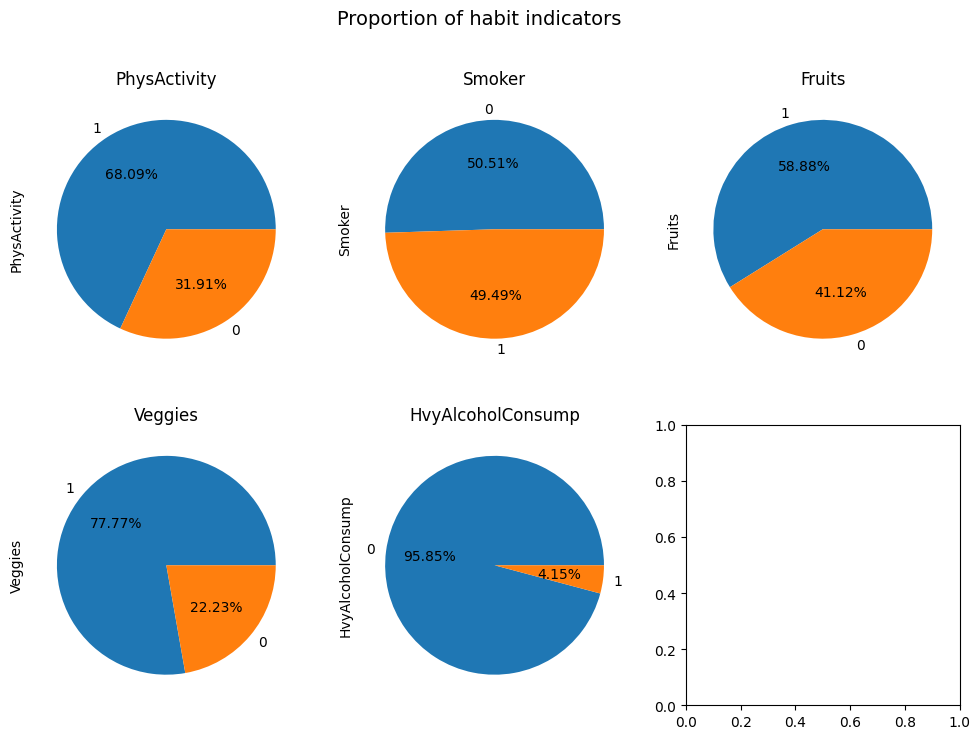

In [ ]:
# now check the distribution of the habit indicators
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
for i, col in enumerate(cat_habit):
    x[col].value_counts().plot.pie(ax=ax[i//3, i%3], autopct='%.2f%%', title=col)
plt.suptitle('Proportion of habit indicators', fontsize=14)
plt.show()

#Feature engineering
Categorising BMI and removing outliers

According to The World Health Organization (WHO)  the following BMI ranges for adults:

* Underweight: BMI less than 18.5
* Normal weight: BMI between 18.5 and 24.9
* Overweight: BMI between 25 and 29.9
* Obesity: BMI of 30 or greater

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


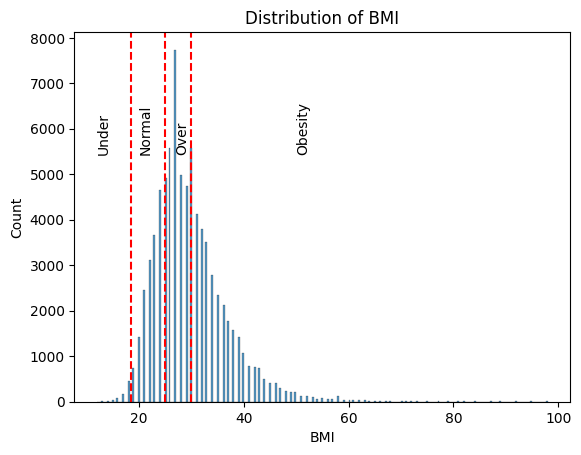

In [ ]:
plt.axvline(18.5, color='red', linestyle='--')
plt.axvline(24.9, color='red', linestyle='--')
plt.axvline(29.9, color='red', linestyle='--')

# add text
plt.text(12, 5500, 'Under', rotation=90, size=10)
plt.text(20, 5500, 'Normal', rotation=90, size=10)
plt.text(27, 5500, 'Over', rotation=90, size=10)
plt.text(50, 5500, 'Obesity', rotation=90, size=10)

sns.histplot(x['BMI'], kde=False)

plt.title('Distribution of BMI')
plt.show()

In [ ]:

# Identify binary and categorical variables
binary_vars = ['HighChol', 'CholCheck', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'DiffWalk']

# Convert binary variables to category type
x[binary_vars] = x[binary_vars].astype('category')

# Map BMI to categorical variable
x['BMI_category'] = pd.cut(x['BMI'], bins=[0, 18.5, 24.9, 29.9, float('inf')], labels=[0,1,2,3])



In [ ]:
x

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,BMI_category
0,4,1,0,1,26,0,0,1,0,1,0,3,5,30,0,2
1,12,1,1,1,26,1,0,0,1,0,0,3,0,0,0,2
2,13,1,0,1,26,0,0,1,1,1,0,1,0,10,0,2
3,11,1,1,1,28,1,0,1,1,1,0,3,0,3,0,2
4,8,0,0,1,29,1,0,1,1,1,0,2,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80687,3,0,0,1,23,1,0,1,0,1,0,3,8,0,1,1
80688,10,1,1,1,22,0,0,0,0,0,0,3,0,30,1,1
80689,7,1,0,1,25,1,0,1,1,0,0,2,5,0,0,2
80690,4,0,1,0,29,0,0,1,1,1,0,3,0,15,0,2


In [ ]:
x=x.drop('BMI', axis=1)

In [ ]:
x


,Age,Sex,HighChol,CholCheck,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,BMI_category
0,4,1,0,1,0,0,1,0,1,0,3,5,30,0,2
1,12,1,1,1,1,0,0,1,0,0,3,0,0,0,2
2,13,1,0,1,0,0,1,1,1,0,1,0,10,0,2
3,11,1,1,1,1,0,1,1,1,0,3,0,3,0,2
4,8,0,0,1,1,0,1,1,1,0,2,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80687,3,0,0,1,1,0,1,0,1,0,3,8,0,1,1
80688,10,1,1,1,0,0,0,0,0,0,3,0,30,1,1
80689,7,1,0,1,1,0,1,1,0,0,2,5,0,0,2
80690,4,0,1,0,0,0,1,1,1,0,3,0,15,0,2


In [ ]:
#encoding the dataset
encode=OrdinalEncoder()


X=encode.fit_transform(x)


In [ ]:
df2=pd.DataFrame(X,columns=['Age',
 'Sex',
 'HighChol',
 'CholCheck',
 'Smoker',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'NewBMI'])

In [ ]:
X_train=df2.astype(int)

In [ ]:
X_train

,Age,Sex,HighChol,CholCheck,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,NewBMI
0,3,1,0,1,0,0,1,0,1,0,2,5,30,0,2
1,11,1,1,1,1,0,0,1,0,0,2,0,0,0,2
2,12,1,0,1,0,0,1,1,1,0,0,0,10,0,2
3,10,1,1,1,1,0,1,1,1,0,2,0,3,0,2
4,7,0,0,1,1,0,1,1,1,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80687,2,0,0,1,1,0,1,0,1,0,2,8,0,1,1
80688,9,1,1,1,0,0,0,0,0,0,2,0,30,1,1
80689,6,1,0,1,1,0,1,1,0,0,1,5,0,0,2
80690,3,0,1,0,0,0,1,1,1,0,2,0,15,0,2


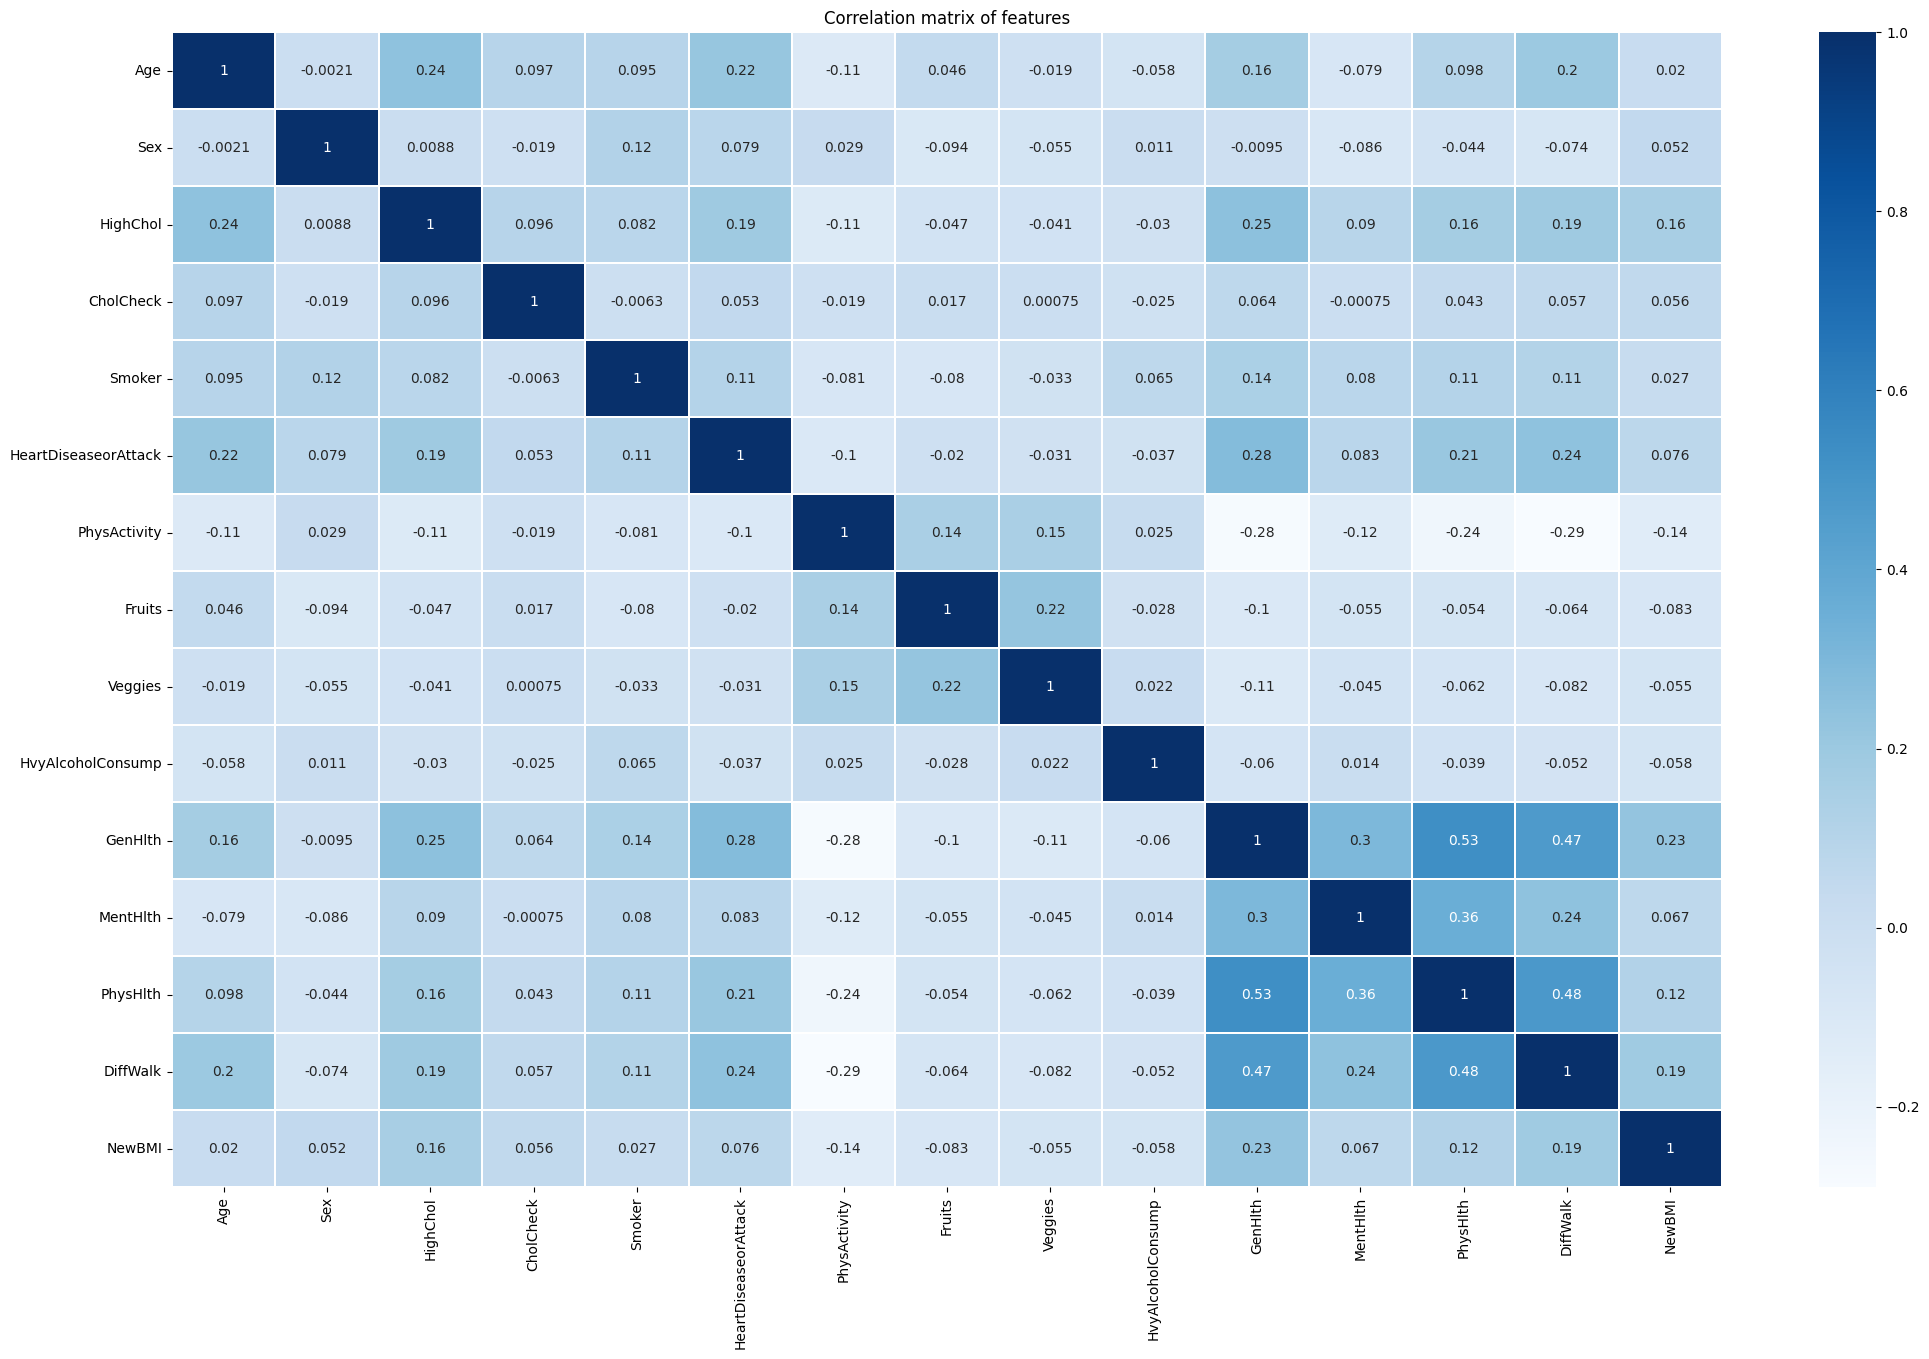

In [ ]:
corr = X_train.corr()
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(corr,annot=True, cmap = "Blues", linewidth = 0.30)
plt.title("Correlation matrix of features")
plt.show()

In [ ]:
X_train_sample= X_train.sample(n=1000, random_state=rand_seed)

In [ ]:
X_train_sample

,Age,Sex,HighChol,CholCheck,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,NewBMI
38364,10,0,1,1,1,1,1,0,1,0,2,0,8,0,2
40486,12,0,1,1,0,0,0,1,1,0,4,0,30,0,3
33498,9,1,1,1,1,0,1,0,1,0,2,0,12,0,3
40105,11,0,1,1,0,1,0,0,1,0,3,15,15,1,2
39946,9,1,1,1,1,0,0,0,1,0,2,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25884,9,1,1,1,0,0,1,1,1,0,1,0,0,0,2
33735,11,0,0,1,0,0,1,1,1,0,2,0,30,0,2
21412,11,0,0,1,0,0,1,1,1,0,1,1,0,0,1
20260,5,1,0,0,1,0,1,1,0,0,1,0,0,0,2


# Unsupervised Learning
Develop a software code for comparing the performance of different types of clustering algorithms and/or different instances of the same type of algortihm, i.e., when changing the parameters value (k for k-means, eps and minpts for DBSCAN, etc…).

In [ ]:
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist as pdist
from scipy.spatial.distance import squareform as sf

In [ ]:
method_merging = 'average'
distance_metric = 'correlation'

In [ ]:
Z = hierarchy.linkage(X_train_sample, method_merging, metric=distance_metric, optimal_ordering='False')

In [ ]:
print("Linkage matrix")
print(Z.round(2))

# Column 3 of Z contains all distances among pairs of clusters
print("\n Distances:")
print(*Z[:,2].round(2))

Linkage matrix
[[5.460e+02 7.140e+02 0.000e+00 2.000e+00]
 [6.200e+01 2.650e+02 0.000e+00 2.000e+00]
 [3.160e+02 8.380e+02 0.000e+00 2.000e+00]
 ...
 [1.989e+03 1.995e+03 6.800e-01 6.640e+02]
 [1.986e+03 1.996e+03 7.100e-01 9.070e+02]
 [1.994e+03 1.997e+03 7.900e-01 1.000e+03]]

 Distances:
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

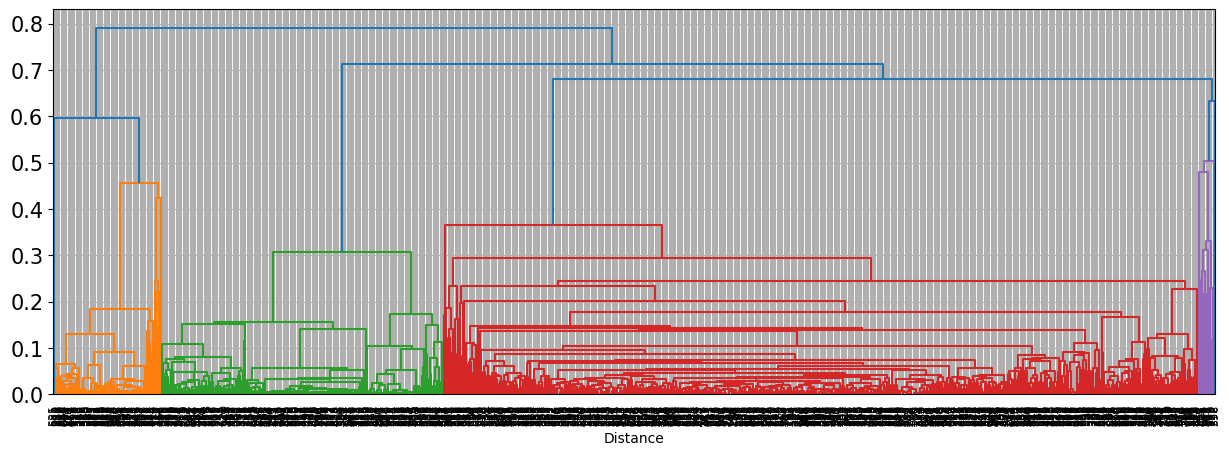

In [ ]:
fig = plt.figure(figsize=(15, 5))
dn = hierarchy.dendrogram(Z, no_plot=0)
plt.tick_params(axis='y', which='major', labelsize=15)
plt.tick_params(axis='x', which='major', labelsize=8)
plt.xlabel('Distance')
plt.grid()
plt.show()

In [ ]:
# Cut the forest to have a certain inter-cluster distance (max_d)
max_d = 0.7

(1000,)
We got 3 cluster(s).


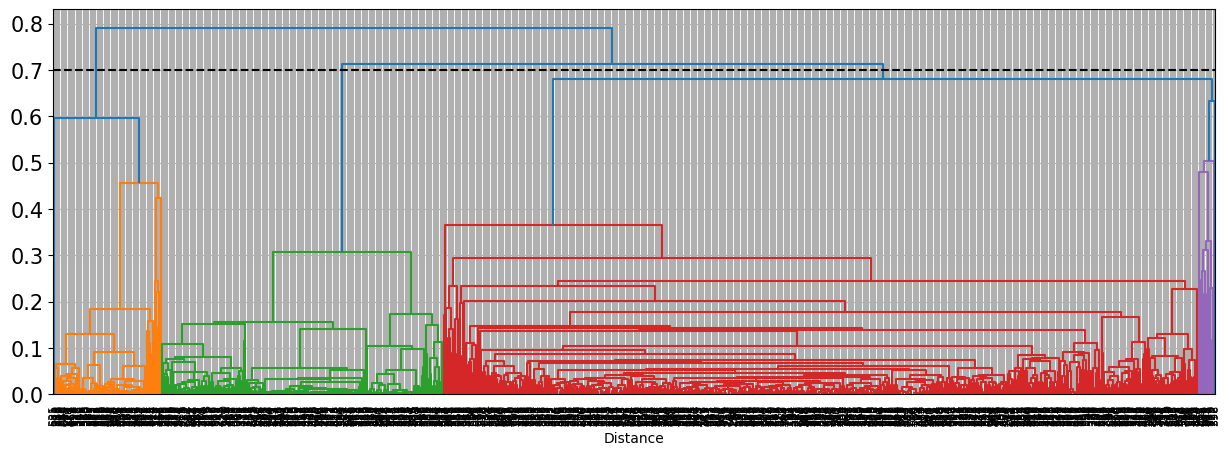

In [ ]:
# Form the clusters. Note: subtract 1 in order for the labels to start from 0 (as it happens in k-means++)
hierarchical_labels = fcluster(Z, max_d, criterion='distance') - 1

print(hierarchical_labels.shape)
#print(hierarchical_labels)

# Confirm that you cut correctly, to have N clusters
Kh = hierarchical_labels.max() + 1
print("We got %d cluster(s)." % Kh)


# Add a vertical line to the dendrogram indicating the cut
plt.figure(fig)
plt.axhline(y=max_d, color='k', linestyle='--')
plt.show()

In [ ]:
# Find centers. Hint: you can refer to the code already developed for Lab02 (with proper modifications)
centers = np.zeros((Kh,15))
print("\nWe need to compute %d centroids, as we have %d clusters." % (Kh, Kh) )
for k in range(0, Kh):
  ind = np.array( np.where(hierarchical_labels == k ) )
  cluster_points = X[ind, :][0]
  centers[k,:] = cluster_points.mean(axis=0)
  print("The centroid of cluster %d has coordinates: " % (k), *centers[k,:].round(2))


We need to compute 3 centroids, as we have 3 clusters.
The centroid of cluster 0 has coordinates:  6.77 0.41 0.4 0.96 0.53 0.04 0.72 0.71 0.84 0.06 1.39 3.12 3.76 0.2 2.02
The centroid of cluster 1 has coordinates:  6.52 0.48 0.35 0.96 0.45 0.08 0.79 0.65 0.81 0.04 1.4 3.62 4.18 0.15 1.92
The centroid of cluster 2 has coordinates:  6.77 0.44 0.37 0.96 0.44 0.06 0.79 0.64 0.83 0.06 1.39 3.06 4.06 0.13 2.0


#K-mode

In [ ]:
!pip install kmodes


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 5692.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 5692.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 5692.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 5692.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 5692.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 124, cost: 5000.0
Run 1, iteration: 2/100, moves: 17, cost: 5000.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 270, cost: 4853.0
Run 2, iteration: 2/100, move

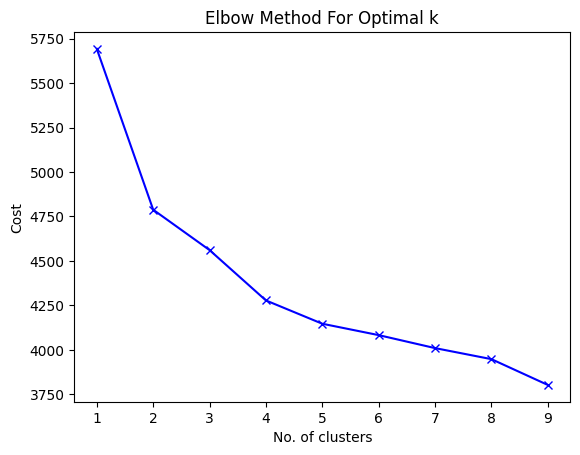

In [ ]:
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline

# Elbow curve to find optimal K
cost = []
K = range(1,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(X_train_sample)
    cost.append(kmode.cost_)

plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# Building the model with 2 clusters
kmode = KModes(n_clusters=2, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(X_train_sample)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 306, cost: 4851.0
Run 1, iteration: 2/100, moves: 56, cost: 4851.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 351, cost: 4863.0
Run 2, iteration: 2/100, moves: 28, cost: 4863.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 286, cost: 4834.0
Run 3, iteration: 2/100, moves: 21, cost: 4834.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 207, cost: 4998.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 182, cost: 4792.0
Run 5, iteration: 2/100, moves: 4, cost: 4792.0
Best run was number 5


array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,

## Unsupervised performance measures

In [ ]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score , calinski_harabasz_score, silhouette_score


# Evaluate the clustering solution using internal validation metrics for Hypertension
dh, Dh, Sh = single_clustering_evaluation(X_train_sample, centers, hierarchical_labels, distance_metric)
calinski_harabasz_herarchy = calinski_harabasz_score(X_train_sample, hierarchical_labels)


print("Calinski-Harabasz Index:", calinski_harabasz_herarchy)


The intra-cluster distance of the three clusters are:  [0.16 0.18 0.15]

All inter-cluster distances organized as proximity matrix:
 [[0.   0.01 0.  ]
 [0.01 0.   0.  ]
 [0.   0.   0.  ]]

For this clustering solution (with 3 clusters), the silhouette score is = 0.722.
Calinski-Harabasz Index: 705.2179346209089


In [ ]:
#Evaluate the clustering solution using internal validation metrics for Hypertension
silhouette_Kmode = silhouette_score(X_train_sample, kmode.labels_)
calinski_harabasz_kmode = calinski_harabasz_score(X_train_sample, kmode.labels_)

print("kmode_Silhouette Score:", silhouette_Kmode)
print("kmode_Calinski-Harabasz Index:", calinski_harabasz_kmode)

kmode_Silhouette Score: 0.07204307982797147
kmode_Calinski-Harabasz Index: 33.96864410534932


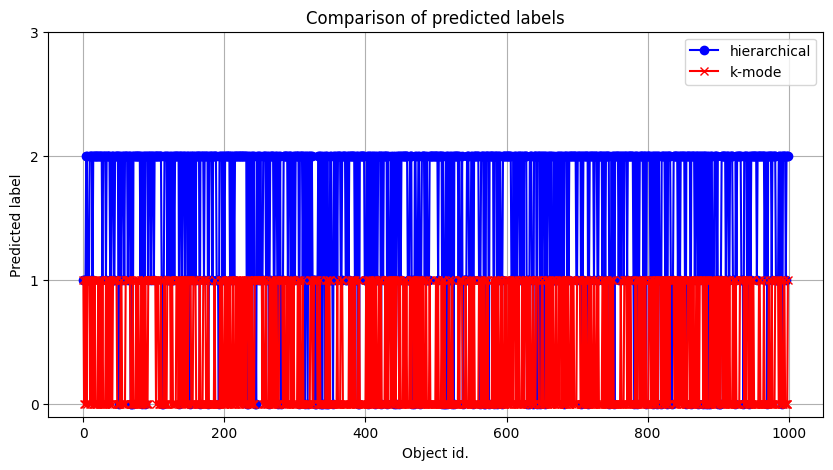

In [ ]:
y1 = hierarchical_labels   # predicted labels from hierarchical clustering
y2 = kmode.labels_        # predicted labels from k-means clustering
Km= kmode.labels_.max()+1
fig20 = plt.figure('Comparison of predicted labels', figsize=(10,5))
plt.plot(y1, color='blue', marker="o", label='hierarchical')
plt.plot(y2, color='red', marker="x", label='k-mode')
plt.xlabel('Object id.')
plt.yticks(np.arange(0,np.max([Km, Kh])+1))
plt.ylabel('Predicted label')
plt.title("Comparison of predicted labels")
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics.cluster import rand_score, adjusted_rand_score

R =rand_score(y1, y2)   # more statistically correct. See comment here: https://scikit-learn.org/stable/modules/clustering.html
print(np.round(R,2))

0.52


In [ ]:
# Proximity matrix: to have an idea of how "similar" are the objects in the dataset
from scipy.spatial.distance import pdist as pdist
from scipy.spatial.distance import squareform as sf

distance_metric = 'correlation'       # You can choose one among the following: 'euclidean', 'minkowski', 'mahalanobis',  'hamming'/'matching', 'jaccard', 'cosine', 'correlation'
PM = pdist(X_train_sample, metric=distance_metric)
PM = sf(PM).round(2)

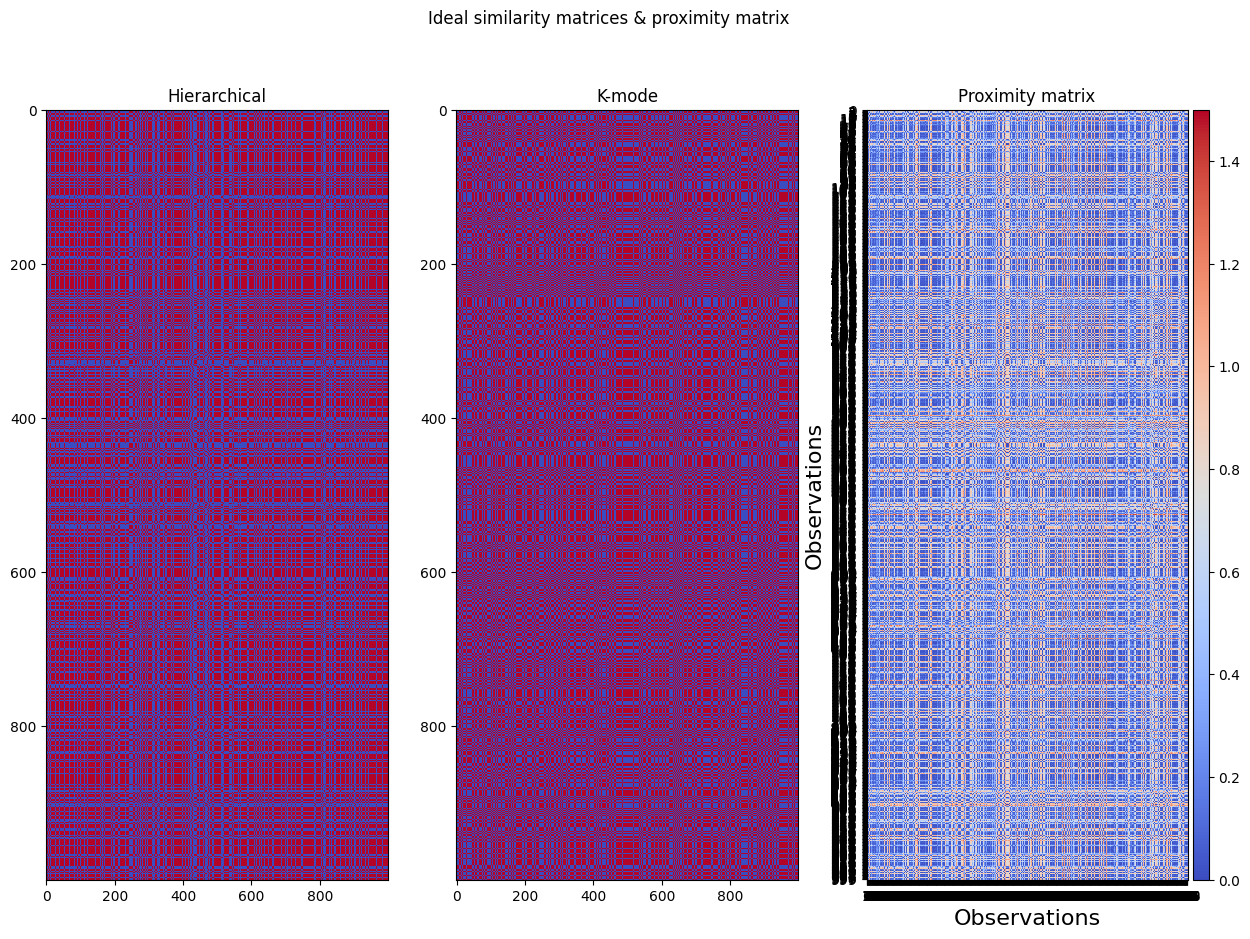

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
# Build the similarity matrix for each clustering solution

# Ideal similarity matrix for hierarchical clustering
SM_hi = np.eye(1000)
for i in range(0, y1.size):
   for j in range(0, y1.size):
       if y1[i] == y1[j]:
        SM_hi[i,j] = 1
        SM_hi[j,i] = 1

# Ideal similarity matrix for k-means++ clustering
SM_km = np.eye(1000)
for i in range(0, y2.size):
   for j in range(0, y2.size):
       if y2[i] == y2[j]:
        SM_km[i,j] = 1
        SM_km[j,i] = 1


fig30 = plt.figure(figsize=(15,10))
fig30.suptitle('Ideal similarity matrices & proximity matrix')

ax1 = fig30.add_subplot(131)
ax1.imshow(SM_hi, interpolation='nearest', aspect='auto', cmap='coolwarm')
ax1.title.set_text('Hierarchical')

ax2 = fig30.add_subplot(132)
ax2.imshow(SM_km, interpolation='nearest', aspect='auto', cmap='coolwarm')
ax2.title.set_text('K-mode')

ax3 = fig30.add_subplot(133)
im3 = ax3.imshow(PM, interpolation='nearest', aspect='auto', cmap='coolwarm')
divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im3, cax=cax)
ax3.set_xlabel('Observations', fontsize=16)
ax3.set_xticks(np.arange(0, 1000, step=1))
ax3.set_ylabel('Observations', fontsize=16)
ax3.set_yticks(np.arange(0, 1000, step=1))
ax3.title.set_text('Proximity matrix')
plt.show()

In [ ]:
# For each clustering solution, compute the correlation between the ideal similarity matrix and the proximity matrix
PM_values = PM[np.triu_indices_from(PM, k=1)]

# hierarchical clustering
SM_hi_values = SM_hi[np.triu_indices_from(SM_hi, k=1)]
ro_hi = np.abs( np.corrcoef(PM_values, SM_hi_values)[0,1].round(2))

# k-means++ clustering
SM_km_values = SM_km[np.triu_indices_from(SM_km, k=1)]
ro_km = np.abs( np.corrcoef(PM_values, SM_km_values)[0,1].round(2))

print('For the hierarchical clustering solution (with %d clusters),' % Kh, 'the cross-correlation is = %.2f.' % ro_hi)
print('For the k-mode clustering solution (with %d clusters),' % Km, 'the cross-correlation is = %.2f.' % ro_km )

For the hierarchical clustering solution (with 3 clusters), the cross-correlation is = 0.81.
For the k-mode clustering solution (with 2 clusters), the cross-correlation is = 0.04.


## Supervised performance measures

In [ ]:

true_lable_diabetes=yA.sample(n=1000, random_state=rand_seed)

true_lable_stroke=yB.sample(n=1000, random_state=rand_seed)

true_lable_hypertension=yC.sample(n=1000, random_state=rand_seed)


In [ ]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score
from sklearn.metrics import silhouette_score, adjusted_rand_score, adjusted_mutual_info_score


# Predicted labels from the hierarchical clustering algorithm
predicted_labels = hierarchical_labels

# Calculate evaluation metrics
ari = adjusted_rand_score(true_lable_diabetes, predicted_labels)
nmi = normalized_mutual_info_score(true_lable_diabetes, predicted_labels)
fmi = fowlkes_mallows_score(true_lable_diabetes, predicted_labels)

print(' Evaluation metrics for hierarchical_diabetes')
print('----------------------------------------')
print("Adjusted Rand Index (ARI):", ari)
print("Normalized Mutual Information (NMI):", nmi)
print("Fowlkes-Mallows Index (FMI):", fmi)


 Evaluation metrics for hierarchical_diabetes
----------------------------------------
Adjusted Rand Index (ARI): 0.02326481291017
Normalized Mutual Information (NMI): 0.026951092431481066
Fowlkes-Mallows Index (FMI): 0.5153631794499433


In [ ]:
ari = adjusted_rand_score(true_lable_stroke, predicted_labels)
nmi = normalized_mutual_info_score(true_lable_stroke, predicted_labels)
fmi = fowlkes_mallows_score(true_lable_stroke, predicted_labels)

print(' Evaluation metrics for hierarchical_stroke')
print('----------------------------------------')
print("Adjusted Rand Index (ARI):", ari)
print("Normalized Mutual Information (NMI):", nmi)
print("Fowlkes-Mallows Index (FMI):", fmi)


 Evaluation metrics for hierarchical_stroke
----------------------------------------
Adjusted Rand Index (ARI): 0.04085183124385018
Normalized Mutual Information (NMI): 0.020529671431200467
Fowlkes-Mallows Index (FMI): 0.6805636058131517


In [ ]:
ari = adjusted_rand_score(true_lable_hypertension, predicted_labels)
nmi = normalized_mutual_info_score(true_lable_hypertension, predicted_labels)
fmi = fowlkes_mallows_score(true_lable_hypertension, predicted_labels)

print(' Evaluation metrics for hierarchical_hypertension')
print('----------------------------------------')
print("Adjusted Rand Index (ARI):", ari)
print("Normalized Mutual Information (NMI):", nmi)
print("Fowlkes-Mallows Index (FMI):", fmi)


 Evaluation metrics for hierarchical_hypertension
----------------------------------------
Adjusted Rand Index (ARI): 0.0051246731983747365
Normalized Mutual Information (NMI): 0.014779391477873445
Fowlkes-Mallows Index (FMI): 0.5086342747484813


In [ ]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score


# Predicted labels from the K-Modes clustering algorithm
predicted_labels = kmode.labels_

# Calculate evaluation metrics
ari = adjusted_rand_score(true_lable_diabetes, predicted_labels)
nmi = normalized_mutual_info_score(true_lable_diabetes, predicted_labels)
fmi = fowlkes_mallows_score(true_lable_diabetes, predicted_labels)

print(' Evaluation metrics for kmode_diabetes')
print('----------------------------------------')
print("Adjusted Rand Index (ARI):", ari)
print("Normalized Mutual Information (NMI):", nmi)
print("Fowlkes-Mallows Index (FMI):", fmi)


 Evaluation metrics for kmode_diabetes
----------------------------------------
Adjusted Rand Index (ARI): 0.05196943445400186
Normalized Mutual Information (NMI): 0.040420070671533345
Fowlkes-Mallows Index (FMI): 0.5308562176686634


In [ ]:
ari = adjusted_rand_score(true_lable_stroke, predicted_labels)
nmi = normalized_mutual_info_score(true_lable_stroke, predicted_labels)
fmi = fowlkes_mallows_score(true_lable_stroke, predicted_labels)

print(' Evaluation metrics for kmode_stroke')
print('----------------------------------------')
print("Adjusted Rand Index (ARI):", ari)
print("Normalized Mutual Information (NMI):", nmi)
print("Fowlkes-Mallows Index (FMI):", fmi)


 Evaluation metrics for kmode_stroke
----------------------------------------
Adjusted Rand Index (ARI): 0.012831839318363252
Normalized Mutual Information (NMI): 0.007673443487618414
Fowlkes-Mallows Index (FMI): 0.6718699997913444


In [ ]:
ari = adjusted_rand_score(true_lable_hypertension, predicted_labels)
nmi = normalized_mutual_info_score(true_lable_hypertension, predicted_labels)
fmi = fowlkes_mallows_score(true_lable_hypertension, predicted_labels)

print(' Evaluation metrics for kmode_hypertension')
print('----------------------------------------')
print("Adjusted Rand Index (ARI):", ari)
print("Normalized Mutual Information (NMI):", nmi)
print("Fowlkes-Mallows Index (FMI):", fmi)


 Evaluation metrics for kmode_hypertension
----------------------------------------
Adjusted Rand Index (ARI): 0.039673868213335135
Normalized Mutual Information (NMI): 0.03577535424897999
Fowlkes-Mallows Index (FMI): 0.5269687324655394


## Utility functions


#### The following function should help you fasten the computation of the proximity matrix, the inter-cluster and intra-cluster distances, and the silhouette score (the global one).

In [ ]:
def single_clustering_evaluation(data, cluster_centers, predicted_labels, distance_metric):

  '''
  INPUT
  data              - data matrix for which to compute the proximity matrix
  cluster_centers   - cluster centres from the clustering solution applied to X
  predicted_labels  - predicted labels from the clustering solution applied to X
  distance_metric   - the metric used to compute all distances
  '''

  '''
  OUTPUT
  (PM - proximity matrix computed on X)
  d  - average distance between pairs of objects in each cluster
  D  - inter-cluster distances
  S  - silhouette score (for the entire clustering solution)
  '''

  # Import packages
  from sklearn.metrics import silhouette_score

  # Set the expected number of clusters, K
  K = len(cluster_centers) #expected number of clusters

  # Intra-cluster distances (average over all pairwise distances) -----------------
  PM = pdist(data, metric=distance_metric)
  PM = sf(PM).round(2)

  d = np.zeros(K)
  for k in range(K):
    ind = np.array( np.where(predicted_labels == k ) )
    for r in range(ind.size):
      d[k] = d[k] + np.sum( PM[ [ind[0][r]], [ind] ] )
    d[k] = d[k]/2                                          # not to consider pairs of pair-wise distance between objects twice (the PM is symmetric)
    d[k] = d[k]/( (ind.size*(ind.size-1)) / 2 )            # to compute the average among N*(N-1)/2 possible unique pairs
  print("The intra-cluster distance of the three clusters are: ", d.round(2))


  # Inter-cluster distance ---------------------------------------------------
  D = pdist(cluster_centers, metric=distance_metric)
  D = sf(D).round(2)
  print("\nAll inter-cluster distances organized as proximity matrix:\n", D)


  # Silhouette score
  S = silhouette_score(data, predicted_labels, metric=distance_metric)
  print( '\nFor this clustering solution (with %d clusters),' % K, 'the silhouette score is = %.3f.' % S    )


  # return PM, d, D, S
  return d, D, S   # PM has been already computed


# Validation and comparision

*  Both supervised and unsupervised performance measures must be made available, at least a couple of them for each class of clustering performance measures. In this case use one by one the following three variables: Hypertension, Stroke and Diabetes, for supervised performance evaluation.